In [41]:
import pandas as pd
from sentence_transformers import SentenceTransformer

In [145]:
import numpy as np

In [81]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'axes.axisbelow': True})

In [2]:
questions_df = pd.read_parquet(
    "../data/intermediate/cleaned_arena_data/questions.parquet"
)
threads_df = pd.read_parquet("../data/intermediate/cleaned_arena_data/threads.parquet")

In [3]:
questions_df

,question_id,thread_id,turn_number,user_query,question_role
0,q_00000000,thread_00000000,1,what models are you?,user
1,q_00000001,thread_00000001,1,تجم تفسرلي علاش فما صبع زايد في مرض blackfond ...,user
2,q_00000002,thread_00000002,1,Ellen White über die Flache Erde,user
3,q_00000003,thread_00000003,1,Test,user
4,q_00000004,thread_00000004,1,"Site: ""m.egwwritings.org/en"" über die flache Erde",user
...,...,...,...,...,...
32879,q_00032879,thread_00024066,6,EPDM기반의 식을 알려줘,user
32880,q_00032880,thread_00024067,1,Какой маленький бизнес открыть в новосибирске?,user
32881,q_00032881,thread_00024067,2,А какой можно начать дома с минимальными затра...,user
32882,q_00032882,thread_00024067,3,Сделай анализ по авито,user


In [17]:
questions_df.user_query.nunique()

28907

In [4]:
questions_merged_df = threads_df.merge(
    questions_df[["thread_id", "question_id", "turn_number", "user_query"]],
    on="thread_id",
)

In [22]:
trump_queries = questions_merged_df[
    questions_merged_df.user_query.str.lower().str.contains("trump")
]

In [28]:
trump_queries[["user_query"]].to_csv("./trump_queries.csv", index=None)

In [25]:
for item in trump_queries.user_query:
    print(item)

find me where and when is trump doing speech today after talk with putin
how many government scientists is Trump planning to fire
what time will Trump release the jfk files
donald trump news
Trump deports 238 ‘gang members’ to El Salvador
Why Donald Trump keep saying that tarrifs are paid by the exporter, can you fact check? Could that mean that the importer and the exporter are the same company in many cases?
trump news 3/18/25
dernire controverse de donald trump
Outcomes of March 18 2025 Trump-Putin phone call
Did Trump release the epstein files
why Supreme Court Chief Justice John Roberts rejects Trump's call for impeaching judge who ruled against him
what did trump do yesterday?
what did trump do yesterday?
what did trump do yesterday?
what did trump do yesterday?
which publically listed European companies have seen their share price improve following Trump's recent moves to withdraw / soften US security commitments to Europe / NATO? How much have their SPs risen? 
Trump, Putin cal

In [5]:
questions_merged_df.primary_intent.value_counts()

primary_intent
Factual Lookup         6015
Info Synthesis         5763
Analysis               3568
Explanation            3415
Recommendation         3357
Guidance               3357
Creative Generation    3264
Other                  3044
Text Processing        1100
Name: count, dtype: int64

In [67]:
filtered_questions_df = questions_merged_df[
    questions_merged_df.languages.apply(lambda x: len(x) == 1 and "English" in x)
]#.query("client_country == 'US'")

In [68]:
len(filtered_questions_df)

17168

In [69]:
filtered_questions_df.user_query.value_counts()

user_query
$MODERATION$ YOUR TEXT VIOLATES OUR CONTENT MODERATION GUIDELINES.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [9]:
len(questions_merged_df)

32884

In [10]:
questions_merged_df.primary_intent.value_counts()

primary_intent
Factual Lookup         6015
Info Synthesis         5763
Analysis               3568
Explanation            3415
Recommendation         3357
Guidance               3357
Creative Generation    3264
Other                  3044
Text Processing        1100
Name: count, dtype: int64

In [16]:
questions_merged_df.query("primary_intent == 'Info Synthesis'").user_query.sample(10)

20072            Is the low taper fade meme still MASSIVE?
10667    You know the Sonic What If? fancomic about wha...
12322    Which companies have the best remote developme...
11515            Найди мне данные про ПО Сфера и ее модули
22098    Compare the specs between ipad 9th gen and hon...
6287                              Average salary/wage rate
29350                               Latest news on Ukraine
16127                              latest tariff situation
2372               search infamouse graphic design quoztes
13334                What happened to today's stock market
Name: user_query, dtype: object

In [19]:
trump_questions_df = questions_merged_df[
    questions_merged_df.user_query.str.lower().str.contains("trump")
]

In [31]:
model = SentenceTransformer("all-MiniLM-L6-v2")

In [34]:
trump_queries.user_query

8        find me where and when is trump doing speech t...
27       how many government scientists is Trump planni...
78              what time will Trump release the jfk files
209                                      donald trump news
233        Trump deports 238 ‘gang members’ to El Salvador
                               ...                        
28455    Please devise a single panel political cartoon...
28676    Since Trump took office, the U.S. has spent ab...
29674    Elon Musk Out at Tesla? Automaker's Board Repo...
29675    How much is actually news and how much is yell...
30646      what is the latest concensus on trump's tariffs
Name: user_query, Length: 222, dtype: object

In [35]:
embeddings = model.encode(trump_queries.user_query.values)

In [38]:
embeddings

array([[ 0.09154678,  0.00135486,  0.04760856, ..., -0.00419786,
        -0.07835842, -0.03332822],
       [ 0.05847841, -0.00485975,  0.10577406, ..., -0.07445777,
         0.01458153,  0.00947916],
       [ 0.02657595,  0.01695785, -0.01534929, ...,  0.00924313,
        -0.07531891,  0.02373923],
       ...,
       [-0.01999084,  0.01240182,  0.14739536, ..., -0.06165464,
         0.02963084,  0.07473945],
       [ 0.0590217 ,  0.0115913 ,  0.03229765, ..., -0.04271543,
         0.06956494,  0.02363146],
       [-0.02181212, -0.04859022,  0.05283807, ..., -0.03753631,
         0.07481737,  0.07107797]], shape=(222, 384), dtype=float32)

In [47]:
thread_df = pd.read_parquet("../data/intermediate/cleaned_arena_data/threads.parquet")

In [53]:
thread_df

,thread_id,original_row_id,timestamp,total_turns,winner,judge,primary_intent,secondary_intent,languages,client_country
0,thread_00000000,0,2025-03-18 16:39:00.550,1,tie,78996144fc08f820066fdaa66f170da6e158c24ad70c4e...,Other,Unassigned,[English],None
1,thread_00000001,1,2025-03-18 16:39:35.849,1,model_a,023f8e28f2b51ef62a7adb0fdf06709b8004773b41ca38...,Explanation,Unassigned,[Arabic],None
2,thread_00000002,2,2025-03-18 16:43:18.951,1,model_b,febd105f4f29cf47f72d9b5bf825bdb848fb009b7b0cd6...,Info Synthesis,Factual Lookup,[German],None
3,thread_00000003,3,2025-03-18 16:43:47.861,1,tie,d3560a0fe5416204140c8b1269b3ff10108c36fe59d355...,Other,Unassigned,[English],None
4,thread_00000004,4,2025-03-18 16:47:47.787,1,model_b,febd105f4f29cf47f72d9b5bf825bdb848fb009b7b0cd6...,Info Synthesis,Unassigned,"[German, English]",None
...,...,...,...,...,...,...,...,...,...,...
24064,thread_00024064,24064,2025-05-09 05:10:41.078,3,model_b,43956094e8aa8b172f5d869d2b155e6dd7a86065fd9e1f...,Guidance,Unassigned,[English],TR
24065,thread_00024065,24065,2025-05-09 05:16:52.273,1,model_b,1eda0ecd002074b1624f41b7bea304ad5f8166575705e4...,Factual Lookup,Unassigned,[Japanese],JP
24066,thread_00024066,24066,2025-05-09 05:16:59.602,6,None,eb8e298d3bf023a06c2bc40fbf35b54304d45eac20bfe9...,Explanation,Unassigned,[Korean],KR
24067,thread_00024067,24067,2025-05-09 05:17:15.568,3,None,1a1ce960efb853bcf8a7a712d0b4777460b9fcd53a1ada...,Recommendation,Unassigned,[Russian],RU


In [108]:
filtered_questions_df = pd.read_parquet("../data/intermediate/question_analysis/english_questions.parquet")

In [109]:
filtered_questions_df

,question_id,thread_id,turn_number,user_query,question_role,question_length
0,q_00000000,thread_00000000,1,what models are you?,user,20
1,q_00000003,thread_00000003,1,Test,user,4
2,q_00000005,thread_00000005,1,Rarest mineral,user,15
3,q_00000007,thread_00000007,1,What's the weather in Sf today,user,30
4,q_00000008,thread_00000008,1,find me where and when is trump doing speech t...,user,72
...,...,...,...,...,...,...
16195,q_00032867,thread_00024062,1,Follow this traffic drop template with real in...,user,935
16196,q_00032869,thread_00024063,1,If I save thousands of dollars into my rdsp ho...,user,66
16197,q_00032870,thread_00024064,1,what should be the computer specifications to ...,user,69
16198,q_00032871,thread_00024064,2,what about gemma3:12b,user,21


In [75]:
len(filtered_questions_df)

16742

In [104]:
temp_query = filtered_questions_df.query("question_length > 1000 and question_length < 1200").iloc[0].user_query

In [105]:
temp_query

'How to fix this issue:\n\nIn file included from /export/contextual-llm/revanth/miniconda3/envs/rag/lib/python3.11/site-packages/flashinfer/data/include/flashinfer/cutlass_utils.cuh:40,\n                 from /root/.cache/flashinfer/90/generated/batch_prefill_with_kv_cache_dtype_q_bf16_dtype_kv_bf16_dtype_o_bf16_dtype_idx_i32_head_dim_qk_128_head_dim_vo_128_posenc_0_use_swa_False_use_logits_cap_False_f16qk_False_sm90/batch_prefill_sm90_config.inc:6,\n                 from /root/.cache/flashinfer/90/generated/batch_prefill_with_kv_cache_dtype_q_bf16_dtype_kv_bf16_dtype_o_bf16_dtype_idx_i32_head_dim_qk_128_head_dim_vo_128_posenc_0_use_swa_False_use_logits_cap_False_f16qk_False_sm90/batch_prefill_sm90.cu:26:\n/export/contextual-llm/revanth/miniconda3/envs/rag/lib/python3.11/site-packages/flashinfer/data/cutlass/tools/util/include/cutlass/util/reference/device/tensor_fill.h:52:10: fatal error: curand_kernel.h: No such file or directory\n   52 | #include <curand_kernel.h>\n      |          

In [103]:
len(temp_query.split())

200

In [107]:
len(filtered_questions_df[filtered_questions_df.question_length < 1000]) / len(filtered_questions_df)

0.9513797634691196

(array([1.0649e+04, 2.6560e+03, 1.0850e+03, 5.3600e+02, 3.2700e+02,
        2.0000e+02, 1.5400e+02, 1.1100e+02, 1.3800e+02, 7.3000e+01,
        5.0000e+01, 4.9000e+01, 4.9000e+01, 2.8000e+01, 3.7000e+01,
        3.8000e+01, 2.4000e+01, 2.0000e+01, 3.1000e+01, 4.7000e+01,
        3.3000e+01, 4.4000e+01, 2.8000e+01, 1.5000e+01, 1.0000e+01,
        9.0000e+00, 9.0000e+00, 1.6000e+01, 9.0000e+00, 6.0000e+00,
        1.5000e+01, 1.4000e+01, 6.0000e+00, 1.7000e+01, 7.0000e+00,
        6.0000e+00, 6.0000e+00, 9.0000e+00, 4.0000e+00, 5.0000e+00,
        3.0000e+00, 7.0000e+00, 5.0000e+00, 7.0000e+00, 5.0000e+00,
        5.0000e+00, 4.0000e+00, 2.0000e+00, 7.0000e+00, 1.5000e+01,
        2.0000e+00, 2.0000e+00, 4.0000e+00, 3.0000e+00, 3.0000e+00,
        6.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00, 3.0000e+00,
        3.0000e+00, 5.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 3.0000e+00, 0.0000e+00, 4.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.2000e+01, 3.00

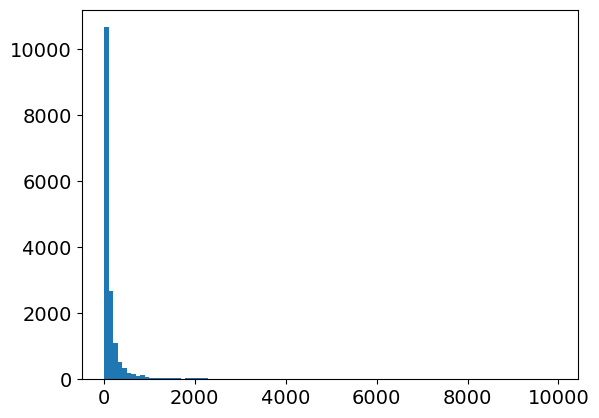

In [84]:
plt.hist(filtered_questions_df.question_length, bins=100)

In [79]:
filtered_questions_df.sample(10)

,question_id,thread_id,turn_number,user_query,question_role,question_length
11457,q_00022486,thread_00016552,1,Write a “The Reason You Suck” speech targeted ...,user,58
13503,q_00026827,thread_00019713,1,Analyze this walkthrough: https://attachments....,user,109
9758,q_00019010,thread_00014023,1,"Is dataverse required for Synapse link, if not...",user,74
12524,q_00024823,thread_00018307,1,most likely outcome in the upcoming match betw...,user,72
5044,q_00010073,thread_00007428,1,Provide me books that talks only about ''crypt...,user,57
9342,q_00018285,thread_00013474,1,find a picture of political map of San Fernand...,user,61
8605,q_00016938,thread_00012495,1,how does moments based marketing can be used f...,user,153
4540,q_00008985,thread_00006590,1,what is deepseek v4,user,19
15330,q_00030057,thread_00022028,2,Составь вопросы по этим текстам и задания на п...,user,1500
4970,q_00009921,thread_00007326,1,give me the top 10 things i have to know to be...,user,59


In [52]:
thread_df.query("thread_id == 'thread_00005113'")

,thread_id,original_row_id,timestamp,total_turns,winner,judge,primary_intent,secondary_intent,languages,client_country
5113,thread_00005113,5113,2025-03-31 23:08:52.300,4,None,aa71d9be0da748da7956ed04693d151a07d24721513a8b...,Guidance,Unassigned,[English],DE


In [115]:
filtered_questions_df

,question_id,thread_id,turn_number,user_query,question_role,question_length
0,q_00000000,thread_00000000,1,what models are you?,user,20
1,q_00000003,thread_00000003,1,Test,user,4
2,q_00000005,thread_00000005,1,Rarest mineral,user,15
3,q_00000007,thread_00000007,1,What's the weather in Sf today,user,30
4,q_00000008,thread_00000008,1,find me where and when is trump doing speech t...,user,72
...,...,...,...,...,...,...
16195,q_00032867,thread_00024062,1,Follow this traffic drop template with real in...,user,935
16196,q_00032869,thread_00024063,1,If I save thousands of dollars into my rdsp ho...,user,66
16197,q_00032870,thread_00024064,1,what should be the computer specifications to ...,user,69
16198,q_00032871,thread_00024064,2,what about gemma3:12b,user,21


In [112]:
embedding_df = pd.read_parquet("../data/intermediate/question_analysis/question_embeddings.parquet")

In [113]:
embedding_df

,question_id,embedding_dim_0,embedding_dim_1,embedding_dim_2,embedding_dim_3,embedding_dim_4,embedding_dim_5,embedding_dim_6,embedding_dim_7,embedding_dim_8,...,embedding_dim_374,embedding_dim_375,embedding_dim_376,embedding_dim_377,embedding_dim_378,embedding_dim_379,embedding_dim_380,embedding_dim_381,embedding_dim_382,embedding_dim_383
0,q_00000000,-0.050277,-0.038691,0.031288,0.017418,0.020181,0.016734,-0.050018,0.044938,-0.008188,...,-0.050258,0.035582,0.039557,-0.038656,-0.014772,-0.023286,0.113934,-0.060589,-0.119848,0.018226
1,q_00000003,0.011573,0.025136,-0.036702,0.059325,-0.007149,-0.041194,0.077087,0.037442,0.012449,...,0.024136,-0.013285,0.006584,0.024441,-0.137136,0.063914,0.196718,-0.006030,0.053194,-0.055226
2,q_00000005,-0.088497,-0.006892,-0.031636,0.054643,0.021555,-0.035480,0.105304,0.081862,-0.057034,...,-0.019110,0.063772,0.037892,0.001182,-0.080631,-0.016791,0.105308,-0.068906,0.042597,0.029517
3,q_00000007,0.024769,0.024241,0.086561,0.037333,0.055036,0.006928,0.052894,-0.012939,-0.039977,...,-0.044029,0.045647,-0.075210,0.031693,-0.049310,-0.000597,-0.109086,-0.041006,-0.108370,0.058959
4,q_00000008,0.091547,0.001355,0.047609,-0.001197,0.041484,-0.005336,0.017463,-0.031565,-0.004608,...,0.042807,0.086708,0.061713,-0.131562,0.003588,-0.016388,-0.018692,-0.004198,-0.078359,-0.033328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16195,q_00032867,-0.014872,-0.038528,0.097519,-0.009888,0.048336,0.083206,0.010408,0.075380,-0.131231,...,0.035525,-0.002631,-0.014322,0.002091,0.033466,-0.014849,0.048609,0.036076,0.018111,0.057941
16196,q_00032869,0.042662,-0.029815,-0.048873,-0.009290,0.062389,0.034192,0.109033,0.079444,0.009840,...,-0.011310,0.004292,-0.006801,-0.025769,0.092560,0.040860,-0.045832,-0.034646,-0.014848,-0.045988
16197,q_00032870,0.045223,-0.032889,0.013942,-0.049912,-0.059453,-0.043311,-0.098691,-0.017375,-0.121734,...,0.100497,0.014672,-0.056922,0.055104,0.027440,0.094958,-0.010419,0.001308,-0.044534,-0.013994
16198,q_00032871,-0.055890,-0.008518,0.000558,-0.046819,-0.037263,-0.039445,0.041913,-0.072153,-0.087326,...,0.066052,0.034355,0.023843,0.080753,0.059079,0.050249,0.060782,-0.046639,-0.066293,0.048753


In [116]:
question_features = pd.read_parquet("../data/intermediate/question_analysis/question_features.parquet")

In [117]:
question_features

,question_id,client_country,question_length_chars,question_length_words,turn_number
0,q_00000000,None,20,4,1
1,q_00000003,None,4,1,1
2,q_00000005,None,15,2,1
3,q_00000007,None,30,6,1
4,q_00000008,None,72,14,1
...,...,...,...,...,...
16195,q_00032867,IN,935,120,1
16196,q_00032869,CA,66,14,1
16197,q_00032870,TR,69,12,1
16198,q_00032871,TR,21,3,2


In [125]:
integrated_citations_df = pd.read_parquet("../data/intermediate/citation_analysis/integrated_citations.parquet")

In [127]:
responses_df = pd.read_parquet("../data/intermediate/cleaned_arena_data/responses.parquet")

In [128]:
responses_df

,response_id,question_id,thread_id,turn_number,model_name_llm,model_name_raw,model_side,response_text,response_role,citation_format,llm_temperature,llm_top_p,llm_max_tokens,search_context_size,user_location_country,search_engine,scrape_engine,context_manager
0,resp_00000000,q_00000000,thread_00000000,1,sonar,sonar,a,"The term ""models"" can refer to various types o...",assistant,original,0.2,0.90,4000.0,None,None,built-in,built-in,built-in
1,resp_00000001,q_00000000,thread_00000000,1,sonar-reasoning,sonar-reasoning,b,## Types of Models in the Fashion Industry \n...,assistant,original,0.2,0.90,4000.0,None,None,built-in,built-in,built-in
2,resp_00000002,q_00000001,thread_00000001,1,gpt-4o-mini-search-preview,gpt-4o-mini-search-preview,a,مرض بلاكفان-دايموند (Diamond-Blackfan Anemia) ...,assistant,original,NaN,NaN,4000.0,medium,None,built-in,built-in,built-in
3,resp_00000003,q_00000001,thread_00000001,1,sonar-pro,sonar-pro,b,Diamond-Blackfan anemia (DBA) is a rare geneti...,assistant,original,0.2,0.90,4000.0,None,None,built-in,built-in,built-in
4,resp_00000004,q_00000002,thread_00000002,1,sonar-reasoning,sonar-reasoning,a,"Ellen White, eine bedeutende Persönlichkeit de...",assistant,original,0.2,0.90,4000.0,None,None,built-in,built-in,built-in
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65763,resp_00065763,q_00032881,thread_00024067,2,gemini-2.5-flash-preview-04-17,gemini-2.5-flash-preview-04-17-grounding,b,Начать свой бизнес на дому с минимальными затр...,assistant,arena_standard,1.0,0.95,NaN,None,None,built-in,built-in,built-in
65764,resp_00065764,q_00032882,thread_00024067,3,gpt-4o-search-preview,gpt-4o-search-preview,a,Анализ данных с платформы «Авито» за последние...,assistant,original,NaN,NaN,16384.0,medium,None,built-in,built-in,built-in
65765,resp_00065765,q_00032882,thread_00024067,3,gemini-2.5-flash-preview-04-17,gemini-2.5-flash-preview-04-17-grounding,b,Avito является одной из крупнейших онлайн-площ...,assistant,arena_standard,1.0,0.95,NaN,None,None,built-in,built-in,built-in
65766,resp_00065766,q_00032883,thread_00024068,1,sonar-pro,sonar-pro-high,a,2019年の上海で開催された「PPL Fighter Masters 2019」（ストリート...,assistant,arena_standard,0.2,0.90,64000.0,high,None,built-in,built-in,built-in


In [129]:
citation_patterns_df = pd.read_parquet("../data/intermediate/question_analysis/citation_patterns.parquet")

In [132]:
citation_patterns_df.head()

,response_id,question_id,num_citations,proportion_high_quality,proportion_low_quality,proportion_unknown_quality,proportion_left_leaning,proportion_right_leaning,proportion_center_leaning,proportion_unknown_leaning,...,proportion_social_media,proportion_unclassified,proportion_wiki,proportion_gov_edu,proportion_tech,proportion_search_engine,proportion_community_blog,proportion_other,response_length,response_word_count
0,resp_00000000,q_00000000,5.0,0.0,0.00,0.2,0.00,0.0,0.2,0.0,...,0.0,0.800000,0.0,0.000000,0.0,0.0,0.0,0.0,4059,384
1,resp_00000001,q_00000000,5.0,0.0,0.00,0.2,0.00,0.0,0.2,0.0,...,0.0,0.800000,0.0,0.000000,0.0,0.0,0.0,0.0,4780,402
2,resp_00000006,q_00000003,2.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,2460,243
3,resp_00000007,q_00000003,7.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,...,0.0,0.714286,0.0,0.142857,0.0,0.0,0.0,0.0,4765,421
4,resp_00000010,q_00000005,4.0,0.5,0.25,0.0,0.25,0.0,0.5,0.0,...,0.0,0.250000,0.0,0.000000,0.0,0.0,0.0,0.0,3259,284


In [136]:
citation_patterns_df['all_types'] = citation_patterns_df[['proportion_news', 'proportion_academic', 'proportion_social_media',
       'proportion_unclassified', 'proportion_wiki', 'proportion_gov_edu',
       'proportion_tech', 'proportion_search_engine',
       'proportion_community_blog', 'proportion_other']].sum(axis=1)

In [141]:
citation_patterns_df.query("all_types < 0.9")

,response_id,question_id,num_citations,proportion_high_quality,proportion_low_quality,proportion_unknown_quality,proportion_left_leaning,proportion_right_leaning,proportion_center_leaning,proportion_unknown_leaning,...,proportion_unclassified,proportion_wiki,proportion_gov_edu,proportion_tech,proportion_search_engine,proportion_community_blog,proportion_other,response_length,response_word_count,all_types
11,resp_00000019,q_00000009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,603,89,0.0
53,resp_00000083,q_00000041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3883,499,0.0
86,resp_00000132,q_00000066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38,8,0.0
96,resp_00000144,q_00000072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208,33,0.0
97,resp_00000145,q_00000072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,310,51,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32372,resp_00065698,q_00032849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,215,43,0.0
32373,resp_00065699,q_00032849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187,32,0.0
32388,resp_00065726,q_00032863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,1,0.0
32390,resp_00065734,q_00032867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,1,0.0


In [148]:
pd.Series(np.isclose(
    citation_patterns_df[['proportion_high_quality', 'proportion_low_quality',
       'proportion_unknown_quality']].sum(axis=1),
    citation_patterns_df['proportion_news']
)).value_counts()

True    32400
Name: count, dtype: int64

In [149]:
pd.Series(np.isclose(
    citation_patterns_df[['proportion_left_leaning',
       'proportion_right_leaning', 'proportion_center_leaning',
       'proportion_unknown_leaning']].sum(axis=1),
    citation_patterns_df['proportion_news']
)).value_counts()

True    32400
Name: count, dtype: int64

In [152]:
citation_patterns_df[['news_proportion_high_quality',
       'news_proportion_low_quality', 'news_proportion_unknown_quality']].sum(axis=1).value_counts()

0.0    23302
1.0     9074
1.0       24
Name: count, dtype: int64

In [155]:
citation_patterns_df[['news_proportion_left_leaning', 'news_proportion_right_leaning',
       'news_proportion_center_leaning', 'news_proportion_unknown_leaning']].sum(axis=1).value_counts()

0.0    23302
1.0     9093
1.0        5
Name: count, dtype: int64

In [154]:
len(citation_patterns_df.query('proportion_news > 0'))

9098

In [130]:
len(citation_patterns_df)

32400

In [131]:
citation_patterns_df.columns

Index(['response_id', 'question_id', 'num_citations',
       'proportion_high_quality', 'proportion_low_quality',
       'proportion_unknown_quality', 'proportion_left_leaning',
       'proportion_right_leaning', 'proportion_center_leaning',
       'proportion_unknown_leaning', 'news_proportion_high_quality',
       'news_proportion_low_quality', 'news_proportion_unknown_quality',
       'news_proportion_left_leaning', 'news_proportion_right_leaning',
       'news_proportion_center_leaning', 'news_proportion_unknown_leaning',
       'proportion_news', 'proportion_academic', 'proportion_social_media',
       'proportion_unclassified', 'proportion_wiki', 'proportion_gov_edu',
       'proportion_tech', 'proportion_search_engine',
       'proportion_community_blog', 'proportion_other', 'response_length',
       'response_word_count'],
      dtype='object')

In [307]:
integrated_data = pd.read_parquet("../data/intermediate/question_analysis/integrated_analysis_data.parquet")

In [310]:
integrated_data_cols = pd.Series(integrated_data.columns)

In [316]:
integrated_data_cols[integrated_data_cols.str.contains("_prob")]

390    topic_0_prob
391    topic_1_prob
392    topic_2_prob
393    topic_3_prob
394    topic_4_prob
395    topic_5_prob
396    topic_6_prob
397    topic_7_prob
398    topic_8_prob
399    topic_9_prob
dtype: object

In [319]:
integrated_data[integrated_data_cols[integrated_data_cols.str.contains("_prob")]].sum(axis=1).value_counts(normalize=True)

1.0    0.496111
0.0    0.270617
1.0    0.115247
1.0    0.074568
1.0    0.039444
1.0    0.003148
1.0    0.000741
1.0    0.000123
Name: proportion, dtype: float64

(array([   18.,    20.,   355.,   249.,   804.,  2537., 10010., 16257.,
         2118.,    32.]),
 array([ 0.69314718,  1.76919777,  2.84524836,  3.92129894,  4.99734953,
         6.07340012,  7.1494507 ,  8.22550129,  9.30155188, 10.37760247,
        11.45365305]),
 <BarContainer object of 10 artists>)

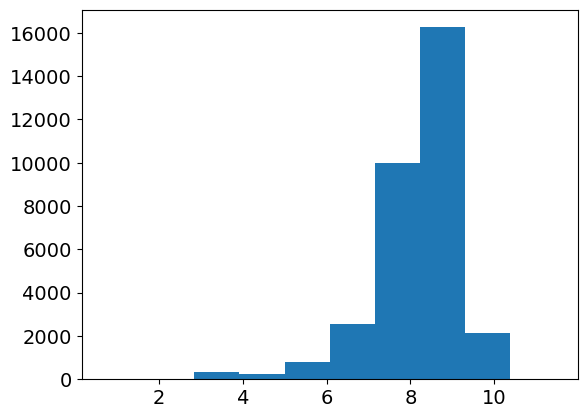

In [200]:
plt.hist(np.log1p(integrated_data.response_length))

In [197]:
integrated_data.response_length.skew()

np.float64(2.4350447988725414)

In [169]:
final_cols = pd.Series(integrated_data.columns)

In [171]:
final_cols[~final_cols.str.contains("embedding")]

0                          question_id
385                     client_country
386              question_length_chars
387              question_length_words
388                        turn_number
389                        response_id
390                      num_citations
391            proportion_high_quality
392             proportion_low_quality
393         proportion_unknown_quality
394            proportion_left_leaning
395           proportion_right_leaning
396          proportion_center_leaning
397         proportion_unknown_leaning
398       news_proportion_high_quality
399        news_proportion_low_quality
400    news_proportion_unknown_quality
401       news_proportion_left_leaning
402      news_proportion_right_leaning
403     news_proportion_center_leaning
404    news_proportion_unknown_leaning
405                    proportion_news
406                proportion_academic
407            proportion_social_media
408            proportion_unclassified
409                    pr

In [186]:
integrated_data.client_country.value_counts().head(10)

client_country
US    8298
GB    1754
IN    1700
DE    1564
MX    1328
CA    1152
RU     816
BR     726
CN     584
HK     574
Name: count, dtype: int64

In [188]:
integrated_data[integrated_data.client_country.isna()]

,question_id,embedding_dim_0,embedding_dim_1,embedding_dim_2,embedding_dim_3,embedding_dim_4,embedding_dim_5,embedding_dim_6,embedding_dim_7,embedding_dim_8,...,response_length,response_word_count,thread_id,model_name_raw,model_side,winner,primary_intent,secondary_intent,total_turns,timestamp
0,q_00000000,-0.050277,-0.038691,0.031288,0.017418,0.020181,0.016734,-0.050018,0.044938,-0.008188,...,4059,384,thread_00000000,sonar,a,tie,Other,Unassigned,1,2025-03-18 16:39:00.550
1,q_00000000,-0.050277,-0.038691,0.031288,0.017418,0.020181,0.016734,-0.050018,0.044938,-0.008188,...,4780,402,thread_00000000,sonar-reasoning,b,tie,Other,Unassigned,1,2025-03-18 16:39:00.550
2,q_00000003,0.011573,0.025136,-0.036702,0.059325,-0.007149,-0.041194,0.077087,0.037442,0.012449,...,2460,243,thread_00000003,gpt-4o-search-preview,a,tie,Other,Unassigned,1,2025-03-18 16:43:47.861
3,q_00000003,0.011573,0.025136,-0.036702,0.059325,-0.007149,-0.041194,0.077087,0.037442,0.012449,...,4765,421,thread_00000003,sonar-pro,b,tie,Other,Unassigned,1,2025-03-18 16:43:47.861
4,q_00000005,-0.088497,-0.006892,-0.031636,0.054643,0.021555,-0.035480,0.105304,0.081862,-0.057034,...,3259,284,thread_00000005,gpt-4o-mini-search-preview,a,model_b,Factual Lookup,Unassigned,1,2025-03-18 16:48:05.061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4511,q_00004494,0.080873,-0.039832,-0.024921,0.005616,0.031538,0.055047,-0.087636,0.021838,-0.113516,...,1002,134,thread_00003398,gpt-4o-search-preview-high-loc,b,None,Info Synthesis,Factual Lookup,1,2025-03-25 20:23:46.517
4512,q_00004496,-0.056053,-0.064608,0.054672,0.061902,0.008923,0.037480,0.049139,-0.001456,-0.009236,...,3521,340,thread_00003399,gpt-4o-search-preview-high-loc,a,None,Explanation,Guidance,3,2025-03-25 20:30:44.417
4513,q_00004496,-0.056053,-0.064608,0.054672,0.061902,0.008923,0.037480,0.049139,-0.001456,-0.009236,...,2126,232,thread_00003399,gpt-4o-search-preview-high,b,None,Explanation,Guidance,3,2025-03-25 20:30:44.417
4514,q_00004497,-0.054150,-0.020687,0.028320,0.048867,-0.062321,-0.007154,-0.095318,-0.065595,0.000821,...,2800,237,thread_00003399,gpt-4o-search-preview-high-loc,a,None,Explanation,Guidance,3,2025-03-25 20:30:44.417


In [215]:
integrated_data.primary_intent.value_counts()

primary_intent
Factual Lookup         6486
Info Synthesis         5844
Recommendation         3956
Analysis               3582
Guidance               3418
Explanation            3216
Creative Generation    3076
Other                  2092
Text Processing         730
Name: count, dtype: int64

In [476]:
clean_features = pd.read_parquet("../data/intermediate/question_analysis/cleaned_features.parquet")

(array([30290.,  1064.,   298.,   154.,   154.,    88.,    72.,    60.,
           96.,   124.]),
 array([-0.31416974,  0.63841007,  1.59098987,  2.54356968,  3.49614948,
         4.44872929,  5.40130909,  6.3538889 ,  7.30646871,  8.25904851,
         9.21162832]),
 <BarContainer object of 10 artists>)

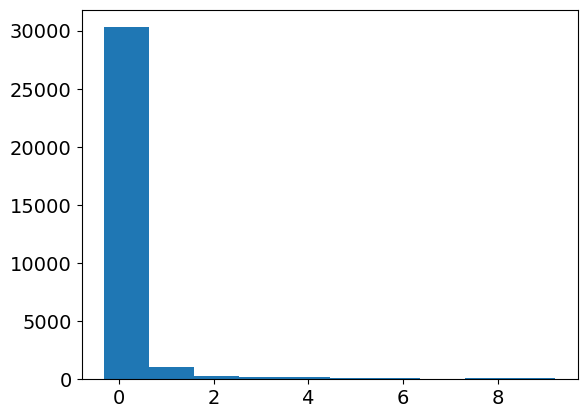

In [488]:
plt.hist(clean_features['topic_9_prob'])

In [341]:
final_cols = pd.Series(clean_features.columns)

In [342]:
for item in final_cols[~final_cols.str.contains("embedding")]:
    print(item)

question_id
question_length_chars
question_length_words
turn_number
topic_0_prob
topic_1_prob
topic_2_prob
topic_3_prob
topic_4_prob
topic_5_prob
topic_6_prob
topic_7_prob
topic_8_prob
topic_9_prob
topic_label
response_id
num_citations
proportion_high_quality
proportion_low_quality
proportion_unknown_quality
proportion_left_leaning
proportion_right_leaning
proportion_center_leaning
proportion_unknown_leaning
news_proportion_high_quality
news_proportion_low_quality
news_proportion_unknown_quality
news_proportion_left_leaning
news_proportion_right_leaning
news_proportion_center_leaning
news_proportion_unknown_leaning
proportion_news
proportion_academic
proportion_social_media
proportion_unclassified
proportion_wiki
proportion_gov_edu
proportion_tech
proportion_search_engine
proportion_community_blog
proportion_other
response_length
response_word_count
thread_id
secondary_intent
total_turns
timestamp
client_country_BR
client_country_CA
client_country_CN
client_country_DE
client_country_GB

In [179]:
clean_features[['model_family_google', 'model_family_openai', 'model_family_perplexity']].sum(axis=1).value_counts()

1    32400
Name: count, dtype: int64

In [346]:
clean_features['topic_nan'].value_counts()

topic_nan
False    32400
Name: count, dtype: int64

In [213]:
clean_features['primary_intent_Text Processing'].value_counts()

primary_intent_Text Processing
False    31670
True       730
Name: count, dtype: int64

In [224]:
clean_features

,question_id,embedding_dim_0,embedding_dim_1,embedding_dim_2,embedding_dim_3,embedding_dim_4,embedding_dim_5,embedding_dim_6,embedding_dim_7,embedding_dim_8,...,embedding_pc_10,embedding_pc_11,embedding_pc_12,embedding_pc_13,embedding_pc_14,embedding_pc_15,embedding_pc_16,embedding_pc_17,embedding_pc_18,embedding_pc_19
0,q_00000000,-0.707197,-0.685479,0.813393,0.455517,0.304765,0.284079,-0.923030,0.607231,0.148532,...,-1.860727,-3.172061,1.286026,0.142763,6.292962,-0.933183,-3.640981,1.742176,0.243404,0.075479
1,q_00000000,-0.707197,-0.685479,0.813393,0.455517,0.304765,0.284079,-0.923030,0.607231,0.148532,...,-1.860727,-3.172061,1.286026,0.142763,6.292962,-0.933183,-3.640981,1.742176,0.243404,0.075479
2,q_00000003,0.513017,0.456687,-0.563940,1.370209,-0.220891,-0.906489,1.221107,0.458820,0.566004,...,-3.214093,-1.395178,0.414170,-0.658875,-2.571010,-0.320999,0.325619,-1.346241,-1.121875,1.493140
3,q_00000003,0.513017,0.456687,-0.563940,1.370209,-0.220891,-0.906489,1.221107,0.458820,0.566004,...,-3.214093,-1.395178,0.414170,-0.658875,-2.571010,-0.320999,0.325619,-1.346241,-1.121875,1.493140
4,q_00000005,-1.461224,-0.116446,-0.461321,1.268022,0.331190,-0.789044,1.697085,1.338292,-0.839572,...,-1.688320,-2.420116,-0.483479,1.742214,-1.465314,0.160002,-1.327270,-4.806304,0.582941,-3.342096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32395,q_00032870,1.176869,-0.581654,0.461999,-1.014103,-1.226901,-0.949992,-1.744094,-0.626526,-2.148402,...,0.861851,2.708886,4.044521,-0.626235,2.466533,-0.432244,-1.454475,3.094458,-1.524332,0.068428
32396,q_00032871,-0.817938,-0.145547,0.190871,-0.946590,-0.800104,-0.870532,0.627751,-1.711079,-1.452361,...,1.085752,0.890072,0.587581,-1.572332,0.426512,-1.564067,0.061202,-1.289900,-0.080150,-1.948084
32397,q_00032871,-0.817938,-0.145547,0.190871,-0.946590,-0.800104,-0.870532,0.627751,-1.711079,-1.452361,...,1.085752,0.890072,0.587581,-1.572332,0.426512,-1.564067,0.061202,-1.289900,-0.080150,-1.948084
32398,q_00032872,-0.096939,-0.023627,-0.237181,-0.447923,-0.777729,-1.718553,-0.557259,-1.652231,-1.614107,...,-2.283223,1.420572,3.767260,1.268541,1.834587,1.030425,0.669332,0.367452,-1.974997,0.495158


(array([  50.,  562., 2460., 6586., 8706., 6928., 4370., 1954.,  676.,
         108.]),
 array([-3.26665521, -2.59371328, -1.92077124, -1.2478292 , -0.57488728,
         0.09805465,  0.77099681,  1.44393849,  2.11688066,  2.78982282,
         3.46276474]),
 <BarContainer object of 10 artists>)

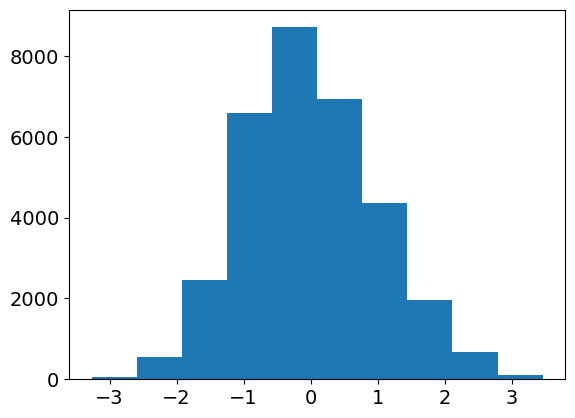

In [299]:
plt.hist(clean_features.embedding_pc_3)

In [288]:
clean_features[['question_id', 'embedding_pc_17']].sort_values("embedding_pc_17").head(20)

,question_id,embedding_pc_17
20481,q_00020599,-7.749867
20480,q_00020599,-7.749867
31775,q_00032179,-7.590799
31774,q_00032179,-7.590799
18811,q_00018871,-7.170707
18810,q_00018871,-7.170707
31477,q_00031850,-6.726144
31476,q_00031850,-6.726144
23307,q_00023616,-6.724707
23306,q_00023616,-6.724707


In [300]:
clean_features[['question_id', 'embedding_pc_17']].query("-1 < embedding_pc_17 < 1")

,question_id,embedding_pc_17
0,q_00000000,0.946254
1,q_00000000,0.946254
2,q_00000003,-0.731204
3,q_00000003,-0.731204
6,q_00000007,-0.244620
...,...,...
32393,q_00032869,0.080101
32396,q_00032871,-0.700602
32397,q_00032871,-0.700602
32398,q_00032872,0.199580


In [306]:
questions_df.query("question_id == 'q_00020599'").user_query.iloc[0]

'i have shamama ambergris attar oil, give me some layering ideas'

In [389]:
len(clean_features.query("topic_7 == 1"))

3258

In [470]:
for query in clean_features.query("topic_7 == 1").merge(questions_df, on='question_id').user_query.sample(10):
    print(query)
    print("---")

i make the poor turn a blind eye yet i'm unattainable by the wealthy what am i
---
Create a detailed fictional inscription of a historical marker describing a place near the town of Thalwil, Zurich, Switzerland.
---
https://www.bbc.co.uk/news/articles/c3e405g2e39o
---
Analyze this guide: https://attachments.f95zone.to/2020/11/917091_Maid_Mansion_Official_Walkthrough.txt. Then, write an optimized walkthrough that allows the player to get all 22 endings using saves. The optimized walkthrough should be structured like this: https://www.otakulair.com/english-visual-novel-walkthroughs/the-wilting-amaranth-walkthrough-reine-works/
---
Why are there so few mentions of Berber extremism on media and literature?
---
how about Land of Hope, Wilfred M. McClay
SKU: 1-14-MCCLOH-H

ISBN/UPC: 44006329712899
---
Analyze this reddit user, summarize their personality and roast them: https://www.reddit.com/u/celatine_
---
Write this in a 8th grade reading level 
---
your job is to convince a medieval scho

In [469]:
citations_df = pd.read_parquet("../data/intermediate/cleaned_arena_data/citations_enriched.parquet")

In [404]:
citations_df

,citation_id,response_id,citation_number,url,domain_full,domain,url_valid,citation_order,political_leaning_score,political_leaning,domain_quality_score,domain_quality,domain_classification
0,cite_00000000,resp_00000000,1,https://www.pixpa.com/blog/types-of-models,pixpa.com,pixpa.com,True,0,NaN,unknown_leaning,NaN,unknown_quality,unclassified
1,cite_00000001,resp_00000000,2,https://brainfall.com/quizzes/which-supermodel...,brainfall.com,brainfall.com,True,1,-0.057987,center_leaning,NaN,unknown_quality,news
2,cite_00000002,resp_00000000,3,https://uquiz.com/quiz/CsHn01/which-supermodel...,uquiz.com,uquiz.com,True,2,-0.319297,center_leaning,NaN,unknown_quality,unclassified
3,cite_00000003,resp_00000000,4,https://www.quotev.com/quizzes/Which+Model+Are...,quotev.com,quotev.com,True,3,-0.086263,center_leaning,NaN,unknown_quality,unclassified
4,cite_00000004,resp_00000000,5,https://www.quotev.com/quizzes/Which+Model+Are...,quotev.com,quotev.com,True,4,-0.086263,center_leaning,NaN,unknown_quality,unclassified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
366082,cite_00366082,resp_00065766,3,https://wellplayed.media/column-yukakuramoti-c...,wellplayed.media,wellplayed.media,True,2,NaN,unknown_leaning,NaN,unknown_quality,unclassified
366083,cite_00366083,resp_00065766,4,https://www.4gamer.net/games/397/G039789/20191...,4gamer.net,4gamer.net,True,3,-0.421465,left_leaning,NaN,unknown_quality,unclassified
366084,cite_00366084,resp_00065766,5,https://fgamers.saikyou.biz/?ときど,fgamers.saikyou.biz,saikyou.biz,True,4,NaN,unknown_leaning,NaN,unknown_quality,unclassified
366085,cite_00366085,resp_00065766,6,https://global.honda/jp/guide/history-digest/7...,global.honda,global.honda,True,5,-0.128852,center_leaning,NaN,unknown_quality,unclassified


In [406]:
responses_df

,response_id,question_id,thread_id,turn_number,model_name_llm,model_name_raw,model_side,response_text,response_role,citation_format,llm_temperature,llm_top_p,llm_max_tokens,search_context_size,user_location_country,search_engine,scrape_engine,context_manager
0,resp_00000000,q_00000000,thread_00000000,1,sonar,sonar,a,"The term ""models"" can refer to various types o...",assistant,original,0.2,0.90,4000.0,None,None,built-in,built-in,built-in
1,resp_00000001,q_00000000,thread_00000000,1,sonar-reasoning,sonar-reasoning,b,## Types of Models in the Fashion Industry \n...,assistant,original,0.2,0.90,4000.0,None,None,built-in,built-in,built-in
2,resp_00000002,q_00000001,thread_00000001,1,gpt-4o-mini-search-preview,gpt-4o-mini-search-preview,a,مرض بلاكفان-دايموند (Diamond-Blackfan Anemia) ...,assistant,original,NaN,NaN,4000.0,medium,None,built-in,built-in,built-in
3,resp_00000003,q_00000001,thread_00000001,1,sonar-pro,sonar-pro,b,Diamond-Blackfan anemia (DBA) is a rare geneti...,assistant,original,0.2,0.90,4000.0,None,None,built-in,built-in,built-in
4,resp_00000004,q_00000002,thread_00000002,1,sonar-reasoning,sonar-reasoning,a,"Ellen White, eine bedeutende Persönlichkeit de...",assistant,original,0.2,0.90,4000.0,None,None,built-in,built-in,built-in
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65763,resp_00065763,q_00032881,thread_00024067,2,gemini-2.5-flash-preview-04-17,gemini-2.5-flash-preview-04-17-grounding,b,Начать свой бизнес на дому с минимальными затр...,assistant,arena_standard,1.0,0.95,NaN,None,None,built-in,built-in,built-in
65764,resp_00065764,q_00032882,thread_00024067,3,gpt-4o-search-preview,gpt-4o-search-preview,a,Анализ данных с платформы «Авито» за последние...,assistant,original,NaN,NaN,16384.0,medium,None,built-in,built-in,built-in
65765,resp_00065765,q_00032882,thread_00024067,3,gemini-2.5-flash-preview-04-17,gemini-2.5-flash-preview-04-17-grounding,b,Avito является одной из крупнейших онлайн-площ...,assistant,arena_standard,1.0,0.95,NaN,None,None,built-in,built-in,built-in
65766,resp_00065766,q_00032883,thread_00024068,1,sonar-pro,sonar-pro-high,a,2019年の上海で開催された「PPL Fighter Masters 2019」（ストリート...,assistant,arena_standard,0.2,0.90,64000.0,high,None,built-in,built-in,built-in


In [409]:
topic_7_citations = clean_features.query("topic_7 == 1").merge(questions_df, on='question_id').merge(
    citations_df, on='response_id'
)

In [414]:
topic_7_citations.columns

Index(['question_id', 'embedding_dim_0', 'embedding_dim_1', 'embedding_dim_2',
       'embedding_dim_3', 'embedding_dim_4', 'embedding_dim_5',
       'embedding_dim_6', 'embedding_dim_7', 'embedding_dim_8',
       ...
       'url', 'domain_full', 'domain', 'url_valid', 'citation_order',
       'political_leaning_score', 'political_leaning', 'domain_quality_score',
       'domain_quality', 'domain_classification'],
      dtype='object', length=517)

In [419]:
topic_7_leaning_df = topic_7_citations[['domain', 'political_leaning']].value_counts().to_frame().reset_index()
topic_7_quality_df = topic_7_citations[['domain', 'domain_quality']].value_counts().to_frame().reset_index()

In [426]:
topic_7_citations.political_leaning.value_counts(normalize=True)

political_leaning
center_leaning     0.466971
unknown_leaning    0.303429
left_leaning       0.206629
right_leaning      0.022971
Name: proportion, dtype: float64

In [465]:
clean_features.query("topic_9 == 1").merge(questions_df, on='question_id').merge(
    citations_df, on='response_id'
).political_leaning.value_counts(normalize=True)

political_leaning
center_leaning     0.643018
unknown_leaning    0.217333
left_leaning       0.137180
right_leaning      0.002470
Name: proportion, dtype: float64

In [471]:
topic_7_citations.query("domain_classification == 'news' and political_leaning == 'left_leaning'").domain.value_counts()#.head(20)

domain
elpais.com           70
knowyourmeme.com     41
pbs.org              36
pewresearch.org      23
libcom.org           18
                     ..
piie.com              1
thecut.com            1
sabah.com.tr          1
cvindependent.com     1
theworld.org          1
Name: count, Length: 184, dtype: int64

In [475]:
clean_features.query("topic_8 == 1").merge(questions_df, on='question_id').merge(
    citations_df, on='response_id'
).query("domain_classification == 'news' and political_leaning == 'left_leaning'").domain.value_counts()

domain
knowyourmeme.com        24
pbs.org                 10
revolt.tv                5
dailydot.com             5
pitchfork.com            4
theatlantic.com          4
elle.com                 4
democracynow.org         4
governing.com            3
ipsos.com                3
aclu.org                 3
pewresearch.org          3
hiphopdx.com             3
hypebeast.com            3
bet.com                  2
thedailybeast.com        2
irishtimes.com           2
harpersbazaar.com        2
goop.com                 2
broadwayworld.com        2
marieclaire.com          2
hrw.org                  2
ubspectrum.com           2
theslateonline.com       2
thehindu.com             1
vulture.com              1
allkpop.com              1
huffingtonpost.co.uk     1
pnas.org                 1
worldbank.org            1
thefulcrum.us            1
smashingmagazine.com     1
indy100.com              1
scienceblogs.com         1
lemonde.fr               1
opb.org                  1
cjr.org              